In [353]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from Schätzer import schätzung
from Normalverteilung import normalverteilung_tool
from scipy.integrate import quad
from scipy.stats import norm

In [28]:
data = pd.read_csv('tennis.csv')
print(data.iloc[3,0])

1


In [380]:
import random
A = 0
B = 0
for i in range(1000):
    if data.iloc[i-1,0] == 1:
        A+=1
    if data.iloc[i-1,0] == 0:
        B+=1

WK_A = A/1000
WK_B = B/1000


def generate_random_number(p):
    """
    Erzeugt eine Zufallszahl (0 oder 1), wobei die Wahrscheinlichkeit für eine 1 genau p beträgt.
    
    Args:
    p (float): Wahrscheinlichkeit für eine 1.
    
    Returns:
    int: 0 oder 1
    """
    return 1 if random.random() < p else 0

def Spiel_(punkte, Tie_Break):
    punkte_A = 0
    punkte_B = 0
    gespielte_punkte = 0
    
    if Tie_Break == 0:
        for punkt in punkte:
            gespielte_punkte += 1
            if punkt == 1:
                punkte_A += 1
            else:
                punkte_B += 1
            
            if punkte_A > 3 and (punkte_A - punkte_B) > 1:
                return 1, gespielte_punkte
            elif punkte_B > 3 and (punkte_B - punkte_A) > 1:
                return 0, gespielte_punkte
    else:
        for punkt in punkte:
            gespielte_punkte += 1
            if punkt == 1:
                punkte_A += 1
            else:
                punkte_B += 1
            
            if punkte_A >= 7 and (punkte_A - punkte_B) > 1:
                return 1, gespielte_punkte
            elif punkte_B >= 7 and (punkte_B - punkte_A) > 1:
                return 0, gespielte_punkte

def Satz_(punkte):
    Satz_A = 0
    Satz_B = 0
    gesamt_gespielte_punkte = 0
    
    while True:
        ergebnis, gespielte_punkte = Spiel_(punkte, 0)
        gesamt_gespielte_punkte += gespielte_punkte
        
        if ergebnis == 1:
            Satz_A += 1
        else:
            Satz_B += 1
        
        if Satz_A == 6 and Satz_B < 5:
            return 1, gesamt_gespielte_punkte
        if Satz_B == 6 and Satz_A < 5:
            return 0, gesamt_gespielte_punkte
        if (Satz_A == 6 and Satz_B >= 5) or (Satz_B == 6 and Satz_A >= 5):
            ergebnis, tie_break_punkte = Spiel_(punkte, 1)
            gesamt_gespielte_punkte += tie_break_punkte
            return ergebnis, gesamt_gespielte_punkte

def Match_(punkte):
    Match_A = 0
    Match_B = 0
    gesamt_gespielte_punkte = 0
    
    for i in range(3):
        ergebnis, satz_gespielte_punkte = Satz_(punkte)
        gesamt_gespielte_punkte += satz_gespielte_punkte
        
        if ergebnis == 1:
            Match_A += 1
        else:
            Match_B += 1
        
        if Match_A == 2:
            return 1, gesamt_gespielte_punkte
        if Match_B == 2:
            return 0, gesamt_gespielte_punkte

def simulation(p, n):
    spiele_gewonnen_A = []
    spiele_dauer = []
    tie_breaks_gewonnen_A = []
    saetze_gewonnen_A = []
    saetze_dauer = []
    matches_gewonnen_A = []
    matches_dauer = []

    for _ in range(n):
        punkte = [generate_random_number(p) for _ in range(100)]
        
        # Spiel Simulation
        spiel_ergebnis, spiel_dauer = Spiel_(punkte, Tie_Break=0)
        spiele_gewonnen_A.append(spiel_ergebnis)
        spiele_dauer.append(spiel_dauer)
        
        # Tie-Break Simulation
        tie_break_ergebnis, _ = Spiel_(punkte, Tie_Break=1)
        tie_breaks_gewonnen_A.append(tie_break_ergebnis)
        
        # Satz Simulation
        satz_ergebnis, satz_dauer = Satz_(punkte)
        saetze_gewonnen_A.append(satz_ergebnis)
        saetze_dauer.append(satz_dauer)
        
        # Match Simulation
        match_ergebnis, match_dauer = Match_(punkte)
        matches_gewonnen_A.append(match_ergebnis)
        matches_dauer.append(match_dauer)

    # Berechnungen der Wahrscheinlichkeiten und Durchschnittswerte
    wahrscheinlichkeit_spiel_gewinnen = sum(spiele_gewonnen_A) / n
    durchschnitt_spiel_dauer = sum(spiele_dauer) / n
    
    wahrscheinlichkeit_tie_break_gewinnen = sum(tie_breaks_gewonnen_A) / n
    
    wahrscheinlichkeit_satz_gewinnen = sum(saetze_gewonnen_A) / n
    durchschnitt_satz_dauer = sum(saetze_dauer) / n
    
    wahrscheinlichkeit_match_gewinnen = sum(matches_gewonnen_A) / n
    durchschnitt_match_dauer = sum(matches_dauer) / n

    return {
        "wahrscheinlichkeit_spiel_gewinnen": wahrscheinlichkeit_spiel_gewinnen*100,
        "durchschnitt_spiel_dauer": durchschnitt_spiel_dauer,
        "wahrscheinlichkeit_tie_break_gewinnen": wahrscheinlichkeit_tie_break_gewinnen*100,
        "wahrscheinlichkeit_satz_gewinnen": wahrscheinlichkeit_satz_gewinnen*100,
        "durchschnitt_satz_dauer": durchschnitt_satz_dauer,
        "wahrscheinlichkeit_match_gewinnen": wahrscheinlichkeit_match_gewinnen*100,
        "durchschnitt_match_dauer": durchschnitt_match_dauer,
    }

# Beispielaufruf der Funktion mit p=0.51 und n=1000000 Simulationen
ergebnisse = simulation(WK_A, 1000)

print(f"(a) Wahrscheinlichkeit, dass A ein Spiel gewinnt: {ergebnisse['wahrscheinlichkeit_spiel_gewinnen']:.2f}%")
print(f"(b) Durchschnittliche Dauer eines Spiels: {ergebnisse['durchschnitt_spiel_dauer']:.2f} Punkte")
print(f"(c) Wahrscheinlichkeit, dass A ein Tie-Break gewinnt: {ergebnisse['wahrscheinlichkeit_tie_break_gewinnen']:.2f}%")
print(f"(d) Wahrscheinlichkeit, dass A einen Satz gewinnt: {ergebnisse['wahrscheinlichkeit_satz_gewinnen']:.2f}%")
print(f"(e) Durchschnittliche Dauer eines Satzes: {ergebnisse['durchschnitt_satz_dauer']:.2f} Punkte")
print(f"(f) Wahrscheinlichkeit, dass A das Match gewinnt: {ergebnisse['wahrscheinlichkeit_match_gewinnen']:.2f}%")
print(f"(g) Durchschnittliche Dauer eines Matches: {ergebnisse['durchschnitt_match_dauer']:.2f} Punkte")


(a) Wahrscheinlichkeit, dass A ein Spiel gewinnt: 52.40%
(b) Durchschnittliche Dauer eines Spiels: 6.73 Punkte
(c) Wahrscheinlichkeit, dass A ein Tie-Break gewinnt: 53.40%
(d) Wahrscheinlichkeit, dass A einen Satz gewinnt: 52.40%
(e) Durchschnittliche Dauer eines Satzes: 40.36 Punkte
(f) Wahrscheinlichkeit, dass A das Match gewinnt: 52.40%
(g) Durchschnittliche Dauer eines Matches: 80.71 Punkte


$$
\textbf{Monte-Carlo-Simulationsaufgabe}
$$

Ein Restaurant bietet ein Mittagsmenü an, bei dem die Anzahl der täglichen Gäste schwankt. Die Verteilung der Gästeanzahl ist wie folgt:

- \(20 \%\) der Tage kommen zwischen \(50\) und \(70\) Gäste.
- \(50 \%\) der Tage kommen zwischen \(71\) und \(100\) Gäste.
- \(30 \%\) der Tage kommen zwischen \(101\) und \(150\) Gäste.

Das Restaurant verdient pro Gast im Durchschnitt \(20\,€\). Die täglichen Fixkosten betragen \(800\,€\), und für jeden Gast fallen zusätzlich \(5\,€\) variable Kosten an.

### Aufgabe:
1. Simuliere für \(1000\) Tage, wie viele Gäste pro Tag das Restaurant erhält, basierend auf der oben angegebenen Verteilung.
2. Berechne für jeden Tag den Gewinn des Restaurants \((\text{Einnahmen} - \text{Fixkosten} - \text{variable Kosten})\).
3. Erstelle ein Histogramm der simulierten täglichen Gewinne.
4. Bestimme:
   - Den durchschnittlichen täglichen Gewinn.
   - Den Prozentsatz der Tage, an denen das Restaurant einen Verlust macht.


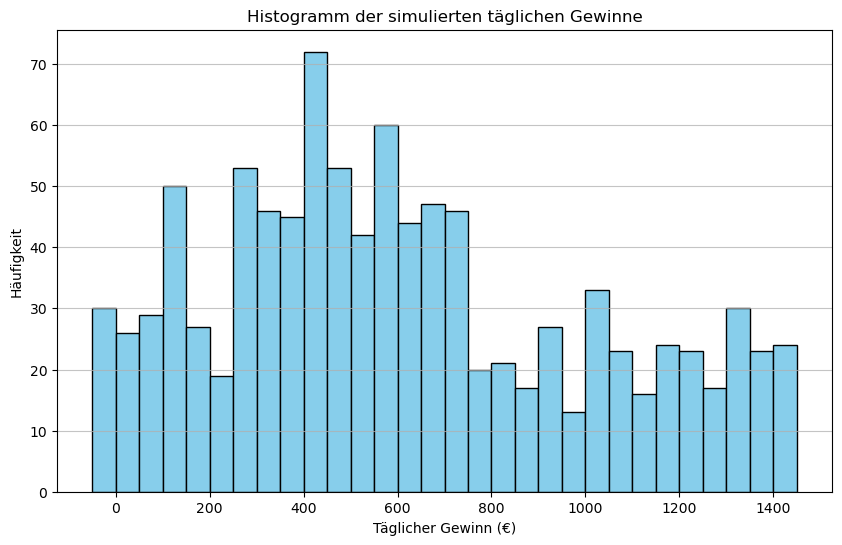

In [347]:
def Zufallswert():
    Gäste = 0
    Zufallswert = random.random()
    if Zufallswert <= 0.2:
        Gäste = random.randint(50,70)
    elif Zufallswert <= 0.7:
        Gäste = random.randint(71,100)
    else:
        Gäste = random.randint(101,150)
    return Gäste

def Gewinn():
    Gäste = Zufallswert()
    Einnahmen = Gäste * 20
    Fixkosten = 800
    variable_kosten = Gäste * 5
    gewinn = Einnahmen - variable_kosten- Fixkosten
    return gewinn

Gewinnliste = []
for i in range(1000):
    Gewinnliste.append(Gewinn())


plt.figure(figsize=(10, 6))
plt.hist(Gewinnliste, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Täglicher Gewinn (€)')
plt.ylabel('Häufigkeit')
plt.title('Histogramm der simulierten täglichen Gewinne')
plt.grid(axis='y', alpha=0.75)
plt.show()

$$
\textbf{Monte-Carlo-Simulationsaufgabe}
$$

Ein Unternehmen plant den Start eines neuen Produkts und möchte den potenziellen Umsatz simulieren. Der Erfolg hängt von mehreren Unsicherheiten ab:

- **Marktgröße**: Die Größe des Marktes wird als normalverteilt angenommen mit einem Mittelwert von \(1.000.000\) potenziellen Kunden und einer Standardabweichung von \(200.000\) Kunden.
- **Marktdurchdringung**: Der Prozentsatz der Kunden, die das Produkt kaufen, beträgt durchschnittlich \(5 \%\), mit einer Schwankung (Standardabweichung) von \(1 \%\).
- **Verkaufspreis**: Der Verkaufspreis des Produkts wird als gleichmäßig verteilt zwischen \(50\,€\) und \(70\,€\) angenommen.

### Aufgabe
1. Simuliere den Umsatz für \(10.000\) mögliche Szenarien, indem du die oben genannten Unsicherheiten modellierst.
2. Erstelle ein Histogramm der simulierten Umsätze.
3. Bestimme:
   - Den durchschnittlichen Umsatz.
   - Die Wahrscheinlichkeit (in \%) dafür, dass der Umsatz die Schwelle von \(3.000.000\,€\) übersteigt.


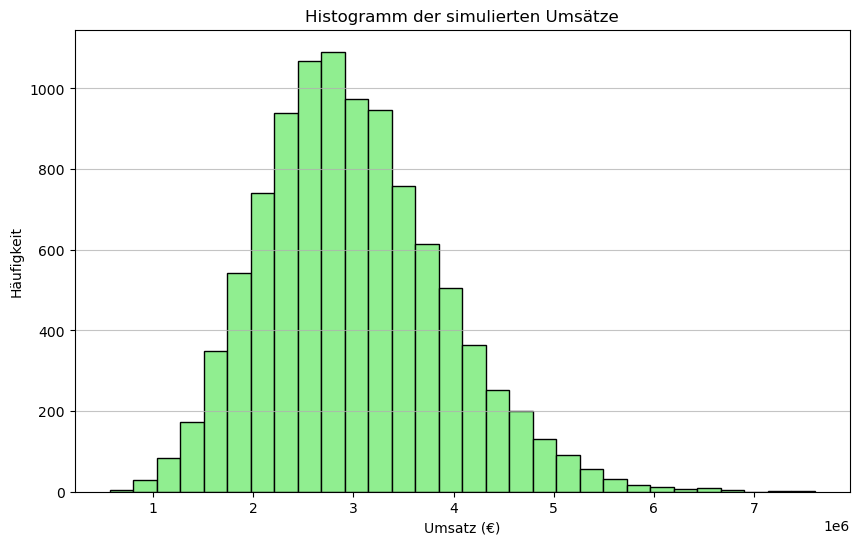

In [379]:
# 1. Generiere Zufallsvariablen NORMALVERTEILT
marktgröße = np.random.normal(1_000_000, 200_000, 10_000)
marktdurchdringung = np.random.normal(0.05, 0.01, 10_000)
verkaufspreis = np.random.uniform(50, 70, 10_000)

# 2. Berechne den Umsatz
umsatz = marktgröße * marktdurchdringung * verkaufspreis

# 3. Histogramm der Umsätze
plt.figure(figsize=(10, 6))
plt.hist(umsatz, bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Umsatz (€)')
plt.ylabel('Häufigkeit')
plt.title('Histogramm der simulierten Umsätze')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [378]:
# 4. Analyse
mean_umsatz = np.mean(umsatz)
percent_above_threshold = np.sum(umsatz > 3_000_000) / len(umsatz) * 100

print(f"Durchschnittlicher Umsatz: {mean_umsatz:.2f} €")
print(f"Prozentsatz der Tage mit Umsatz > 3.000.000 €: {percent_above_threshold:.2f} %")


Durchschnittlicher Umsatz: 3007280.80 €
Prozentsatz der Tage mit Umsatz > 3.000.000 €: 46.93 %


## Monte-Carlo-Simulationsaufgabe

Ein Unternehmen verkauft ein Produkt, dessen Preis sich in einem bestimmten Bereich bewegt. Die Unsicherheit liegt in der Menge der verkauften Einheiten und den damit verbundenen Kosten.

- **Preis pro Produkt**: Der Preis des Produkts folgt einer Normalverteilung mit einem Mittelwert von 100 € und einer Standardabweichung von 10 €.
- **Verkaufte Einheiten**: Die Anzahl der verkauften Einheiten folgt einer Poisson-Verteilung mit einem Mittelwert von 500 Einheiten pro Monat.
- **Variable Kosten pro Einheit**: Die variablen Kosten pro Einheit betragen im Durchschnitt 30 €, mit einer Standardabweichung von 5 €.

### Aufgabe:
1. Simuliere den Umsatz für **12 Monate** unter Berücksichtigung der oben genannten Unsicherheiten.
2. Berechne für jeden Monat den Gewinn des Unternehmens, indem du den Umsatz abzüglich der variablen Kosten für die verkauften Einheiten und die monatlichen Fixkosten (5000 €) berechnest.
3. Erstelle ein Histogramm der simulierten monatlichen Gewinne.
4. Bestimme:
   - Den durchschnittlichen monatlichen Gewinn.
   - Die Wahrscheinlichkeit, dass der monatliche Gewinn unter 10.000 € liegt.

### Hinweise:
- **Preis pro Produkt**: \( \text{Normalverteilung}(100, 10) \)
- **Verkaufte Einheiten**: \( \text{Poissonverteilung}(500) \)
- **Variable Kosten pro Einheit**: \( \text{Normalverteilung}(30, 5) \)


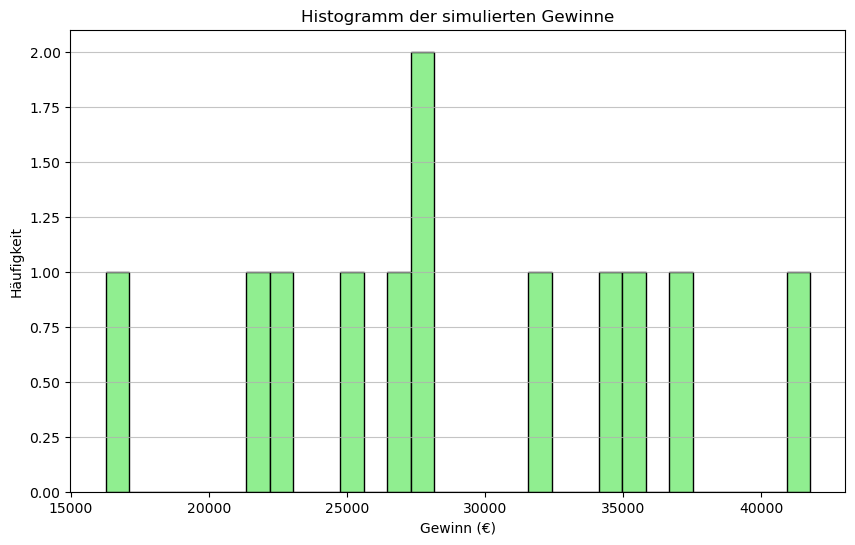

In [405]:
preis = np.random.normal(100, 10, 12)
verkaufte_einheit = np.random.poisson(500,12)
kosten = np.random.normal(30, 5, 12)

# 4. Berechne den Umsatz
umsatz = preis * verkaufte_einheit

# 5. Berechne die variablen Kosten
variable_kosten = kosten * verkaufte_einheit

# 6. Definiere die Fixkosten
fixkosten = 5000

# 7. Berechne den Gewinn
gewinn = umsatz - variable_kosten - fixkosten

plt.figure(figsize=(10, 6))
plt.hist(gewinn, bins=30, color='lightgreen', edgecolor='black')
plt.xlabel('Gewinn (€)')
plt.ylabel('Häufigkeit')
plt.title('Histogramm der simulierten Gewinne')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [437]:
# 8. Berechne den durchschnittlichen Gewinn
mean = np.mean(gewinn)
print(f"Durchschnittlicher monatlicher Gewinn: {mean:.2f} €")

# 9. Berechne die Wahrscheinlichkeit für einen Gewinn unter 10.000 €
percent_above_threshold = np.sum(gewinn < 10000) / 12 * 100
print(f"Prozentsatz der Monate mit Gewinn unter 10.000 €: {percent_above_threshold:.2f} %")

Durchschnittlicher monatlicher Gewinn: 29121.77 €
Prozentsatz der Monate mit Gewinn unter 10.000 €: 25.00 %
